In [1]:
%matplotlib inline
import os
from os import walk
from skimage.io import imread
from skimage.io import imshow
from skimage.io import imsave
import numpy as np

In [4]:
vessel_file_name = '/home/maltsevav/Documents/bvt'
vessel_data_f = open (vessel_file_name, 'r')
vessel_data_contents = vessel_data_f.readlines()
vessel_data_f.close()

filtered_list = []
for x in vessel_data_contents:
    x = [y.strip() for y in x.split('\t')]
    filtered_list.append(x)

In [5]:
length = len(filtered_list)
print length
for x in range(0,length):
    print filtered_list[x]

1
['213', '111', '76']


In [6]:
filtered_list.sort(key=lambda x: x[0])

In [6]:
length = len(filtered_list)
print length
for x in range(0,length):
    print filtered_list[x]

11
['0_masked_3a_vesselmap.mat', '177.258', '63.050', '32.672']
['13_masked_3a_vesselmap.mat', '197.747', '82.368', '23.138']
['14_masked_3a_vesselmap.mat', '172.023', '64.087', '14.094']
['18_masked_3a_vesselmap.mat', '169.845', '58.952', '35.187']
['1_masked_3a_vesselmap.mat', '206.117', '92.574', '9.868']
['2_masked_3a_vesselmap.mat', '194.336', '65.877', '20.011']
['3_masked_3a_vesselmap.mat', '201.645', '81.078', '44.665']
['5_masked_3a_vesselmap.mat', '213.046', '111.542', '66.752']
['6_masked_3a_vesselmap.mat', '199.997', '90.651', '32.909']
['7_masked_3a_vesselmap.mat', '165.081', '56.339', '17.006']
['8_masked_3a_vesselmap.mat', '156.986', '78.258', '11.747']


In [8]:
path_data = '/home/maltsevav/Documents/drusen'
os.chdir(path_data)
root_dir, dir_list, file_list = next( walk('.') )

In [9]:
file_list.sort()

In [10]:
len(file_list)

11

In [11]:
file_list

['0_masked_3a.tiff',
 '13_masked_3a.tiff',
 '14_masked_3a.tiff',
 '18_masked_3a.tiff',
 '1_masked_3a.tiff',
 '2_masked_3a.tiff',
 '3_masked_3a.tiff',
 '5_masked_3a.tiff',
 '6_masked_3a.tiff',
 '7_masked_3a.tiff',
 '8_masked_3a.tiff']

## Average Values: 168   86   43

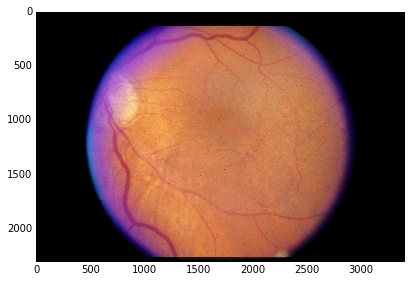

In [133]:
img = imread('/Users/maltsevav/Documents/Fundus_o/original_3b/6_masked_3b.tiff')
imshow(img)

In [134]:
dr = 168 - 189#float(filtered_list[0][0]) 
dg = 86 - 96#float(filtered_list[0][1])
db = 43 - 93#float(filtered_list[0][2])

In [135]:
print dr, dg, db
#print filtered_list[0][0], filtered_list[0][1], filtered_list[0][2]

-21 -10 -50


In [136]:
img = img.astype(int)
mask = img > 0   
img[:,:,0] = img[:,:,0] + dr
img[:,:,1] = img[:,:,1] + dg
img[:,:,2] = img[:,:,2] + db
mask = img < 0
img[mask] = 0
mask = img > 255
img[mask] = 255
img = img.astype(np.uint8)

In [137]:
img = img.astype(np.uint8)

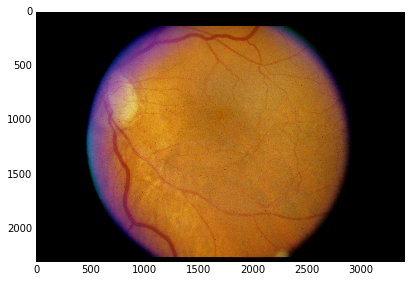

In [138]:
imshow(img)

In [45]:
import matplotlib.pyplot as plt`

In [ ]:
img = img.astype(np.uint8)

In [60]:
print max(img[:,:,0])

NameError: name 'max2' is not defined

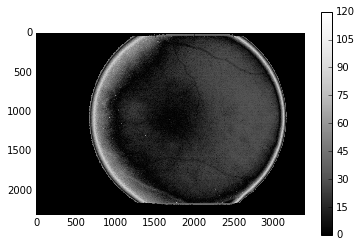

In [55]:
imgplot = plt.imshow(img[:,:,0],cmap='Greys_r', vmin = 0, vmax = 120)
plt.colorbar()

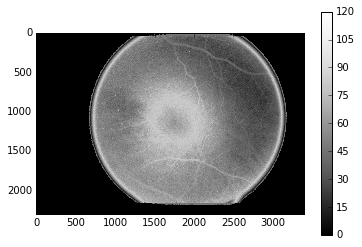

In [56]:
imgplot2 = plt.imshow(img[:,:,1],cmap='Greys_r', vmin = 0, vmax = 120)
plt.colorbar()

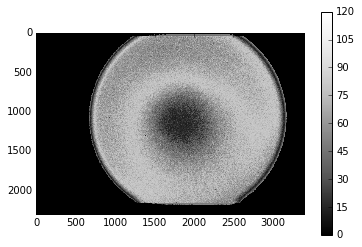

In [57]:
imgplot3 = plt.imshow(img[:,:,2],cmap='Greys_r', vmin = 0, vmax = 120)
plt.colorbar()

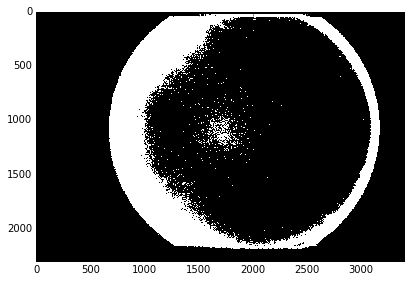

In [33]:
imshow(mask[:,:,0])

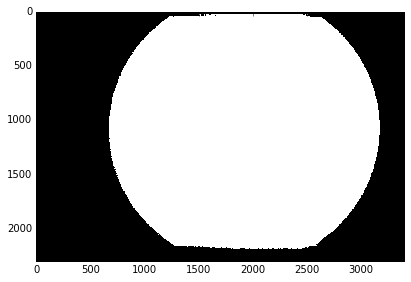

In [35]:
imshow(mask[:,:,1])

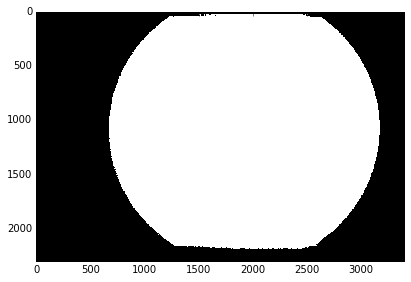

In [36]:
imshow(mask[:,:,2])

In [15]:
path_mkdir = '/home/maltsevav/Documents/autocorrection'
os.chdir(path_mkdir)
os.mkdir('drusen_corrected')
os.chdir((path_mkdir + '/drusen_corrected'))
length = len(file_list)
for j in range(0, length): #length
    file_path = path_data + '/' + file_list[j]
    print file_list[j]
    print filtered_list[j][0]
    dr = 193.1605 - float(filtered_list[j][1]) 
    dg = 88.4590 - float(filtered_list[j][2])
    db = 40.7706 - float(filtered_list[j][3])
    img = imread(file_path)
    img = img.astype(int)
    mask = img > 0   
    img[mask[:,:,0]] = img[mask[:,:,0]] + dr
    img[mask[:,:,1]] = img[mask[:,:,1]] + dg
    img[mask[:,:,2]] = img[mask[:,:,2]] + db
    mask = img < 0
    img[mask] = 0
    mask = img > 255
    img[mask] = 255
    #mask = img < 20
    #mask = np.logical_and( np.logical_and( mask[:,:,0], mask[:,:,1] ), mask[:,:,2] )
    #img[mask] = 0
    img = img.astype(np.uint8)
    new_name = "corrected_" + file_list[j]
    #imshow(img)
    imsave(new_name, img)

0_masked_3a.tiff
0_masked_3a_vesselmap.mat
13_masked_3a.tiff
13_masked_3a_vesselmap.mat
14_masked_3a.tiff
14_masked_3a_vesselmap.mat
18_masked_3a.tiff
18_masked_3a_vesselmap.mat
1_masked_3a.tiff
1_masked_3a_vesselmap.mat
2_masked_3a.tiff
2_masked_3a_vesselmap.mat
3_masked_3a.tiff
3_masked_3a_vesselmap.mat
5_masked_3a.tiff
5_masked_3a_vesselmap.mat
6_masked_3a.tiff
6_masked_3a_vesselmap.mat
7_masked_3a.tiff
7_masked_3a_vesselmap.mat
8_masked_3a.tiff
8_masked_3a_vesselmap.mat
